In [3]:
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_path = r"F:\Data\BikeData.csv"
rides = pd.read_csv(data_path)
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


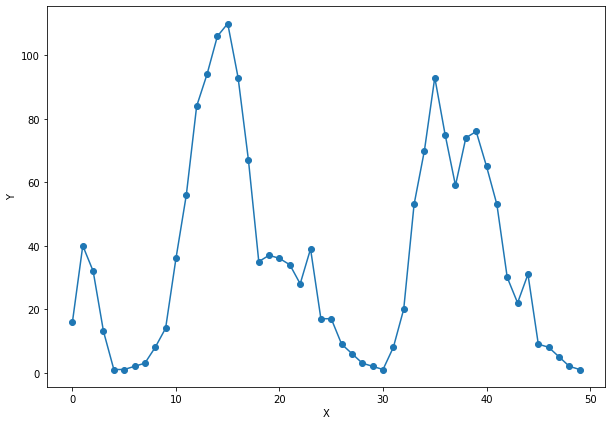

In [5]:
counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)
plt.figure(figsize=(10,7))
plt.plot(x,y,'o-')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
counts = rides['cnt'][:50]
x = torch.tensor(np.arange(len(counts)),dtype=torch.double,requires_grad=True)
y = torch.tensor(np.array(counts),dtype=torch.double,requires_grad=True)
a = torch.rand(1,dtype=torch.double,requires_grad=True)
b = torch.rand(1,dtype=torch.double,requires_grad=True)
print('Initial parameters:',[a,b])
learning_rate = 0.00001
for i in range(10000):
    predictions = a * x + b
    loss = torch.mean((predictions - y)**2)
    if i % 1000 ==0:
        print('Loss:',loss)
    loss.backward()
    a.data.add_(- learning_rate * a.grad.data)
    b.data.add_(- learning_rate * b.grad.data)
    a.grad.data.zero_()
    b.grad.data.zero_()

Initial parameters: [tensor([0.1278], dtype=torch.float64, requires_grad=True), tensor([0.4446], dtype=torch.float64, requires_grad=True)]
Loss: tensor(2060.4532, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1351.7902, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1348.2947, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1344.8350, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1341.4107, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1338.0215, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1334.6670, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1331.3468, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1328.0607, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(1324.8082, dtype=torch.float64, grad_fn=<MeanBackward0>)


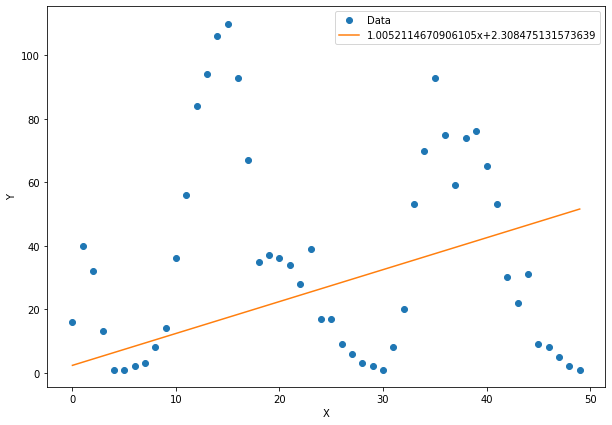

In [9]:
x_data = x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y.data.numpy(),'o')
yplot, = plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0])+'x+'+str(b.data.numpy()[0])
plt.legend([xplot,yplot],['Data',str1])
plt.show()

In [38]:
counts = rides['cnt'][:50]
x = torch.tensor(np.arange(len(counts),dtype=float),requires_grad=True)
y = torch.tensor(np.array(counts,dtype=float),requires_grad=True)
# print(y)
sz = 10
weights = torch.randn((1,sz),dtype=torch.double,requires_grad=True)
biases = torch.randn(sz,dtype=torch.double,requires_grad=True)
weights2 = torch.randn((sz,1),dtype=torch.double,requires_grad=True)
learning_rate = 0.001
losses = []
x = x.view(50,-1)
y = y.view(50,-1)
# print(y)
for i in range(100000):
    hidden = weights * x + biases
    hidden = torch.sigmoid(hidden)
    #print(hidden)
    predictions = hidden.mm(weights2)
    #print(predictions)
    loss = torch.mean((predictions-y)**2)
    #print(loss.size())
    losses.append(loss.data.numpy())
    if i % 10000 == 0:
        print('Loss:',loss)
    loss.backward()
    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

Loss: tensor(2226.7071, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(674.0596, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(535.3604, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(508.8212, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(475.2894, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(471.4497, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(470.7464, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(470.3090, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(469.6267, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(468.0980, dtype=torch.float64, grad_fn=<MeanBackward0>)


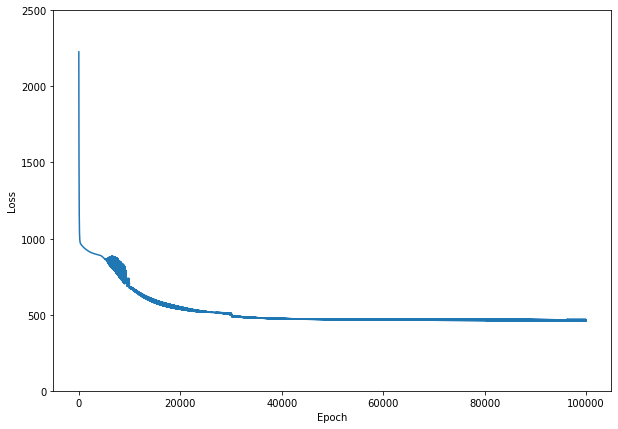

In [39]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.ylim((0,2500))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

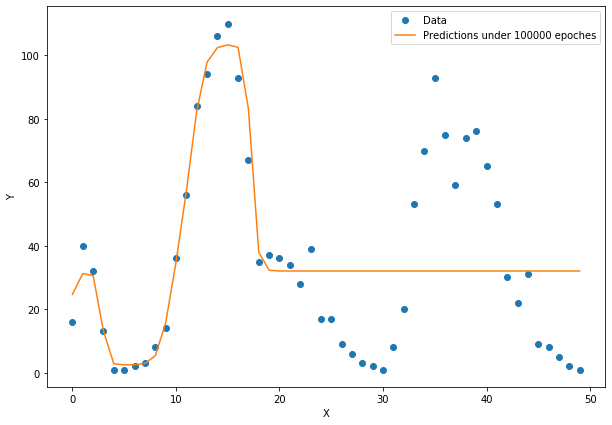

In [41]:
x_data = x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y.data.numpy(),'o')
yplot, = plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Predictions under 100000 epoches'])
plt.show()

In [7]:
counts = rides['cnt'][:50]
x = torch.tensor(np.arange(len(counts),dtype=float)/len(counts),requires_grad=True)
y = torch.tensor(np.array(counts,dtype=float),requires_grad=True)

sz =10
ws1 = torch.randn((1,sz),dtype=torch.double,requires_grad=True)
b = torch.randn(sz,dtype=torch.double,requires_grad=True)
ws2 = torch.randn((sz,1),dtype=torch.double,requires_grad=True)

learning_rate = 0.001
losses = []

x = x.view(50,-1)
y = y.view(50,-1)
# print((x*ws1+b).mm(ws2))
for i in range(100000):
    hidden = x * ws1 + b
    hidden = torch.sigmoid(hidden)
    predictions = hidden.mm(ws2)
    loss = torch.mean((predictions-y)**2)
    losses.append(loss.data.numpy())
    
    if i % 10000 == 0:
        print('Loss:',loss)
    loss.backward()
    ws1.data.add_(- learning_rate * ws1.grad.data)
    b.data.add_(- learning_rate * b.grad.data)
    ws2.data.add_(- learning_rate * ws2.grad.data)
    ws1.grad.data.zero_()
    b.grad.data.zero_()
    ws2.grad.data.zero_()
    

Loss: tensor(2216.1072, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(911.2103, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(678.2264, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(509.1622, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(425.3210, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(212.6261, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(127.8648, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(86.7290, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(61.6485, dtype=torch.float64, grad_fn=<MeanBackward0>)
Loss: tensor(51.9046, dtype=torch.float64, grad_fn=<MeanBackward0>)


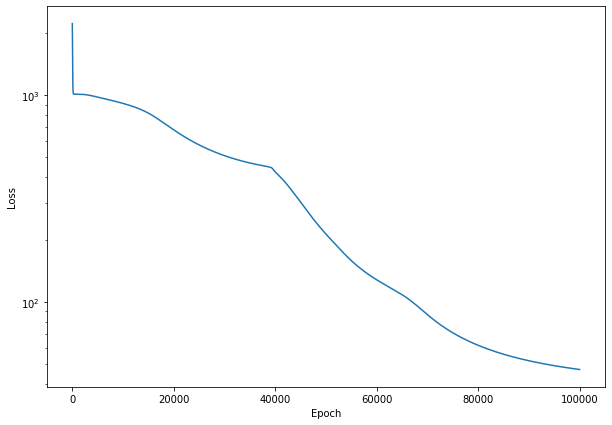

In [8]:
plt.figure(figsize=(10,7))
plt.semilogy(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

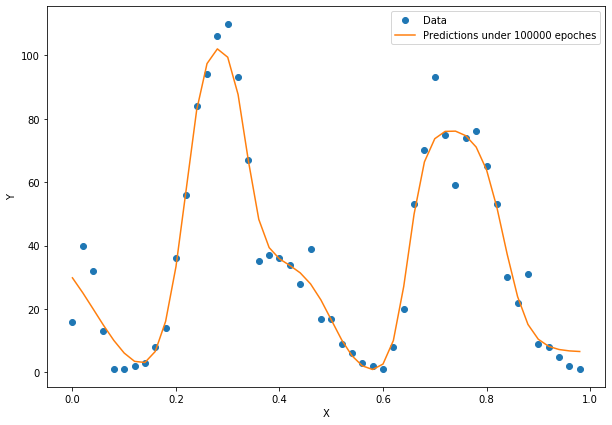

In [9]:
x_data = x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y.data.numpy(),'o')
yplot, = plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Predictions under 100000 epoches'])
plt.show()

tensor(6502.3238, dtype=torch.float64, grad_fn=<MeanBackward0>)


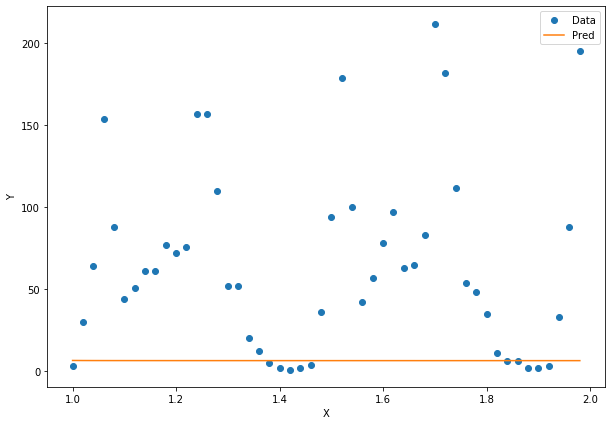

In [27]:
counts_pred = rides['cnt'][50:100]
x = torch.tensor((np.arange(50,100,dtype=float)/len(counts_pred)),requires_grad=True)
y = torch.tensor(np.array(counts_pred,dtype=float),requires_grad=True)
x = x.view(50,-1)
y = y.view(50,-1)
# print(x,y)
hidden = x * ws1 + b
hidden = torch.sigmoid(hidden)
predictions = hidden.mm(ws2)
loss = torch.mean((predictions-y)**2)
print(loss)

x_data = x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y.data.numpy(),'o')
yplot, = plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Pred'])
plt.show()

